# Naive Bayes Classifier

# Objective:
To filter mobile phone spam using the Naive Bayes algorithm

# Dataset: sms_spam.csv
https://github.com/stedy/Machine-Learning-with-R-datasets

# 1. Load necessary libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report
import statsmodels.api as sm

# 2. Load data

In [2]:
df=pd.read_csv('spamsms-1.csv',encoding = 'latin-1')
df.head()

df.columns
df1=df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)
df1.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# 3. Exploring and preparing the data 

In [3]:
df1.isnull().sum()

type    0
text    0
dtype: int64

In [4]:
df1['type'].value_counts()

type
ham     4825
spam     747
Name: count, dtype: int64

## a) Find the distribution of target variable (Class) 


<Axes: xlabel='type', ylabel='count'>

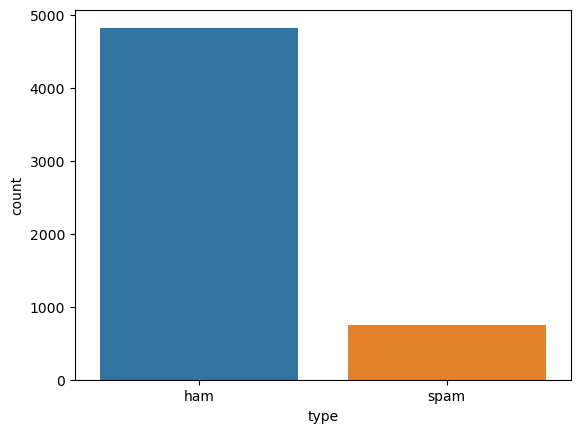

In [5]:
sns.countplot(data=df1,x=df1['type'],hue='type')

## b) Plot the distribution of target variable using histogram

## c) Summary Statistics and explain insights for at least 2 variables

# 4. Create training and test datasets

In [11]:
X=df1.drop('type',axis=1)
Y=df1['type']
print(X.head())
print(Y.head())


                                                text
0  Go until jurong point, crazy.. Available only ...
1                      Ok lar... Joking wif u oni...
2  Free entry in 2 a wkly comp to win FA Cup fina...
3  U dun say so early hor... U c already then say...
4  Nah I don't think he goes to usf, he lives aro...
0     ham
1     ham
2    spam
3     ham
4     ham
Name: type, dtype: object


# 5. Prepare the data by splitting the text documents into words and also create indicator feature for frequent words


Here, as this the dataset which requires some Text Analytics. This might not yet come into your notice, hence giving the 
solution for the reference. This may be helpful in the future concepts.

We want to find the frequencies of words in the spam and non-spam messages. The words of the messages will be model features.

In [15]:
#Data preparation – splitting text documents into words
def text_process (x):
    return x.split()
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['text'])
print(len(bow_transformer.vocabulary_))

15585


In [17]:
print(bow_transformer.get_feature_names_out()[0])
print(bow_transformer.get_feature_names_out()[8555])

!
february


In [19]:
df['length'] = df['text'].apply(lambda x: len(x))
df = df[df['length']>0]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   type        5572 non-null   object
 1   text        5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
 5   length      5572 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 261.3+ KB


In [20]:
x_train = df[:4168]['text']
y_train = df[:4168]['type']
x_test = df[4168:]['text']
y_test = df[4168:]['type']

In [21]:
#Data preparation – creating indicator features for frequent words
messages_bow = bow_transformer.transform(x_train)
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(4168, 15585)


# 6. Create indicator features for frequent words

In [22]:
messages_bow = bow_transformer.transform(x_train)
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(4168, 15585)


# 7. Train a model on the data

In [23]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, y_train)

# 8. Evaluate model performance

In [24]:
messages_bow = bow_transformer.transform(x_test)
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(1404, 15585)


In [25]:
y_pred = spam_detect_model.predict(messages_tfidf)
print(y_pred)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [26]:
print("confusion_matrix")
print(confusion_matrix(y_test,y_pred))

confusion_matrix
[[1222    0]
 [  80  102]]


# 9. Measure performance for classifcation

In [27]:
df_table = confusion_matrix(y_test,y_pred)
a = (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])
p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
f = (2 * p * r) / (p + r)

print("accuracy : ",round(a,2))
print("precision: ",round(p,2))
print("recall   : ",round(r,2))
print("F1 score : ",round(f,2))

accuracy :  0.94
precision:  1.0
recall   :  0.56
F1 score :  0.72
